In [34]:
import warnings
warnings.filterwarnings('ignore')
#DML
import pandas as pd
import numpy as np

#DV
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
sub = pd.read_csv('data/gender_submission.csv')

### 1. Initial Data Review:



In [5]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
sub.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [8]:
print(f'Train : {df_train.shape}')
print(f'Test: {df_test.shape}')
print(f'Sub : {sub.shape}')

Train : (891, 12)
Test: (418, 11)
Sub : (418, 2)


### 2. Data Description :
- Survival:	Survival	0 = No, 1 = Yes
- Pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- Sex:	    Sex	
- Age:	    Age in years	
- SibSp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	    Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


### 3. Exploratory Data Analysis 

In [9]:
print(df_train.info())
print('-'*30)
print(df_test.info())

#Missing Values in Age and Cabin vars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  4

In [10]:
print(df_train.describe())
print('-'*30)
print(df_test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
------------------------------
       PassengerId      Pclass         Age       S

In [11]:
# Missing Values
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Splitting Num/Cat Var


### Categorical Variables


Sex

In [12]:
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
pd.pivot_table(df_train,index='Sex',values='Survived')

,Survived
Sex,
female,0.742038
male,0.188908


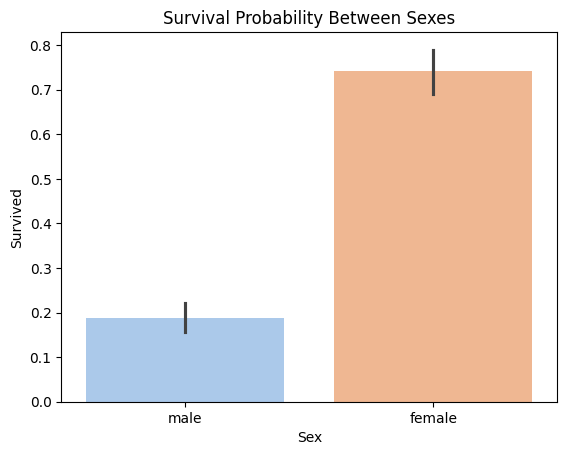

In [14]:
sns.barplot(data= df_train,x='Sex',y='Survived',palette='pastel')
plt.title('Survival Probability Between Sexes')
plt.show()


PClass (Ticket Class)

In [15]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
pd.pivot_table(df_train,index='Pclass',values='Survived')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


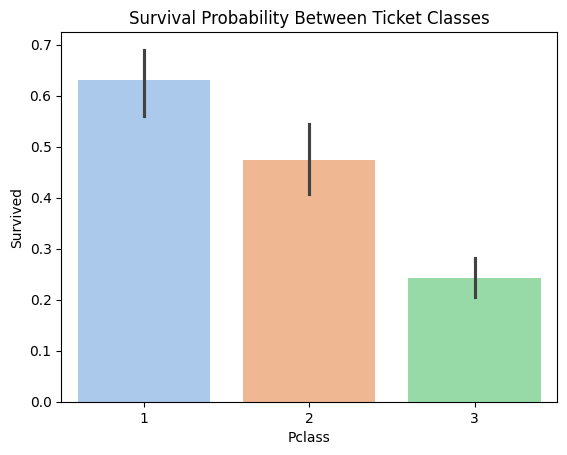

In [17]:
sns.barplot(data= df_train,x='Pclass',y='Survived',palette='pastel')
plt.title('Survival Probability Between Ticket Classes')
plt.show()


Embarked

In [18]:
df_train['Embarked'].value_counts(dropna=True)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
pd.pivot_table(df_train,index='Embarked',values='Survived')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


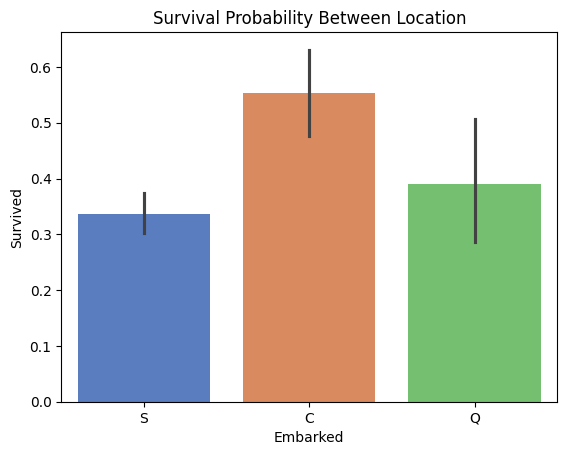

In [20]:
sns.barplot(df_train,x='Embarked',y='Survived',palette='muted')
plt.title('Survival Probability Between Location')
plt.show()

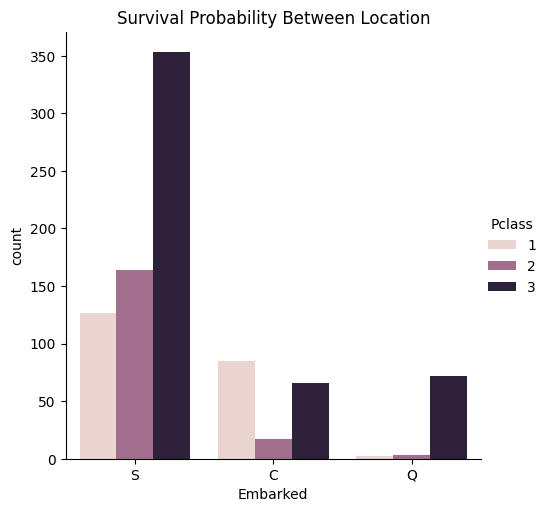

In [21]:
sns.catplot(x='Embarked',data=df_train, hue='Pclass', kind='count')
plt.title('Survival Probability Between Location')
plt.show()

Comments:
- Passenger Class, 1st Class passengers were probably prioritised due to having a higher socioeconomic status.
- Sex, Women were probably prioritised during escape
- Embarked, Cherbourg had the highest amount of 1st class ticket holders, hence highest survival rate.

### Numerical Variables

In [22]:
df_numerical = df_train[['Age','Parch','SibSp','Fare','Cabin','Ticket']]

Age

In [23]:
df_numerical['Age'].isna().sum()
#Missing Values

177

In [24]:
plt.figure(figsize=(5,5))
sns.histplot(plt.figure(figsize=(5,5))
sns.histplot(df_numerical['Age'],palette='pastel')
plt.title('Distribution of Age')
plt.show()

#Shows healthy age pyramid,palette='pastel')
plt.title('Distribution of Age')
plt.show()

#Shows healthy age pyramid

SyntaxError: '(' was never closed (3828493994.py, line 2)

using KDE (Kernel Density Estimator), alike to hist


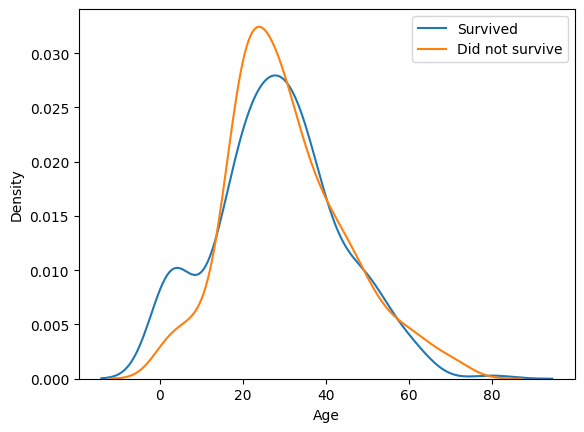

In [ ]:
sns.kdeplot(df_train['Age'][df_train['Survived']==1],label = 'Survived')
sns.kdeplot(df_train['Age'][df_train['Survived']==0],label = 'Did not survive')
plt.legend()
plt.show()

Parent Child

In [ ]:
df_numerical['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

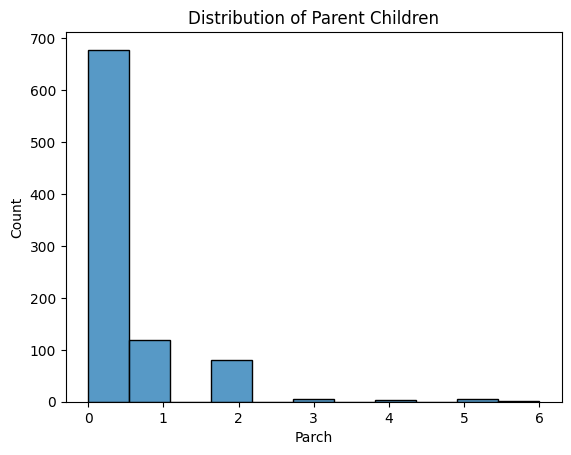

In [ ]:
sns.histplot(df_numerical['Parch'])
plt.title('Distribution of Parent Children')
plt.show()

SibSp


In [ ]:
df_numerical['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

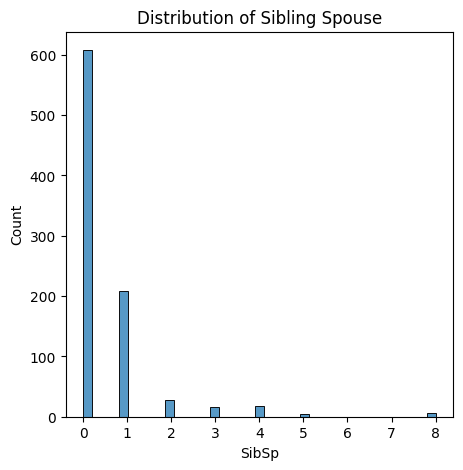

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df_numerical['SibSp'],palette='pastel')
plt.title('Distribution of Sibling Spouse')
plt.show()


<Axes: >

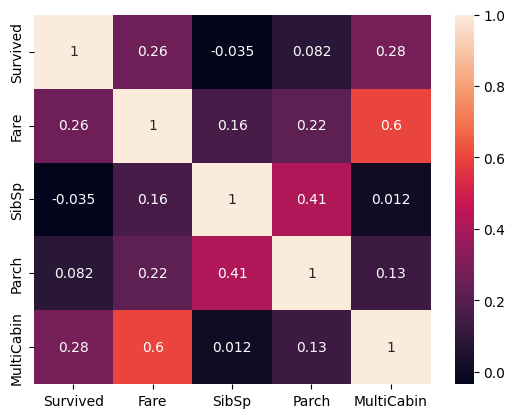

In [41]:
sns.heatmap(df_train[['Survived','Fare','SibSp','Parch','MultiCabin']].corr(), annot=True)

In [39]:
#New Variable (Augment) MultiCabin : Number of Cabins Booked by Name
df_train['MultiCabin'] = df_train['Cabin'].apply(lambda x : 0 if pd.isna(x) else len(x.split(" "))) 

### Data Preprocessing

In [42]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
MultiCabin       0
dtype: int64

In [45]:
df_train = df_train.drop(columns=['Cabin','Ticket'])
df_test = df_test.drop(columns=['Cabin','Ticket'])
#No idea how to use Ticket, using MultiCabin instead of Cabin

KeyError: "['Cabin', 'Ticket'] not found in axis"

In [50]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [52]:
df_train['Embarked'].fillna('S',inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,MultiCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [53]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

In [55]:
df_train.isna().sum()
# Cleaned Up df_train

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
MultiCabin     0
dtype: int64

In [56]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [58]:
df_test["Age"].fillna(df_test['Age'].mean(),inplace=True)
df_test["Fare"].fillna(df_test['Fare'].mean(),inplace=True)
#Impute with mean

In [61]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,MultiCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,1


Encode Gender

In [64]:
df_train['Sex'] = df_train['Sex'].map({'male':0,'female':1})

Encode Embarked

In [73]:
df_train = df_train.join(pd.get_dummies(df_train['Embarked']))
df_train.drop(columns=['Embarked'],inplace=True)

In [76]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,MultiCabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,0,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,1,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,0,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,1,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,0,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,1,True,False,False


Encode Passenger Class

In [77]:
df_train = df_train.join(pd.get_dummies(df_train['Pclass']))
df_train.drop(columns=['Pclass'],inplace=True)

In [78]:
df_train

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,MultiCabin,C,Q,S,1,2,3
0,1,0,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,0,False,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1,True,False,False,True,False,False
2,3,1,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,0,False,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,1,False,False,True,True,False,False
4,5,0,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,0,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,0,False,False,True,False,True,False
887,888,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,1,False,False,True,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,0,False,False,True,False,False,True
889,890,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,1,True,False,False,True,False,False
